# Pengenalan

ETL merupakan tahapan untuk mengubah data dari raw menjadi layak digunakan untuk menjadi data warehouse (data siap dianalisis). Kali ini kita akan membedah dataset yang berisi **5000 data** dengan berisikan:

1. participant_id: ID dari peserta/partisipan hackathon. Kolom ini bersifat unique sehingga antar peserta pasti memiliki ID yang berbeda
2. first_name: nama depan peserta
3. last_name: nama belakang peserta
4. birth_date: tanggal lahir peserta
5. address: alamat tempat tinggal peserta
6. phone_number: nomor hp/telepon peserta
7. country: negara asal peserta
8. institute: institusi peserta saat ini, bisa berupa nama perusahaan maupun nama universitas
9. occupation: pekerjaan peserta saat ini
10. register_time: waktu peserta melakukan pendaftaran hackathon dalam second

**GOAL**
1. Melakukan manipulasi data
2. Membuat variabel baru yang berguna untuk analisis
3. Menyimpan di warehouse

# Library yang digunakan

Dalam proses ETL ini ada beberapa library yang berguna untuk melakukan manipulasi data. Saat ini kita akan mencoba dengan library berikut:

In [ ]:
# Jika belum instal
# !pip3 install pandas
# !pip3 install regex

import pandas as pd
import re

# Extract data dan Belajar REGEX

Disini kita akan melihat data raw yang kita miliki untuk dilakukan manipulasi dan selanjutnya disimpan dalam warehouse

In [ ]:
# read_csv() -- digunakan karena data berupa .csv
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqthon-participants.csv')

# menampilkan isi data sekilas
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  5000 non-null   object 
 1   first_name      5000 non-null   object 
 2   last_name       5000 non-null   object 
 3   birth_date      5000 non-null   object 
 4   address         5000 non-null   object 
 5   phone_number    5000 non-null   object 
 6   country         5000 non-null   object 
 7   institute       5000 non-null   object 
 8   occupation      5000 non-null   object 
 9   register_time   5000 non-null   float64
dtypes: float64(1), object(9)
memory usage: 390.8+ KB


Bagaimana menurut teman-teman tentang datanya?

# Transform data

Disini kita akan melakukan manipulasi/transformasi data, artinya merubah nilai menjadi nilai yang sesuai ataupun merubah format.

```python
# search berguna untuk mencari sebuah pola
txt = "Kemarin hujan di Mandalika"
x = re.search("^Kemarin.*Mandalika$", txt)
print(x.group(0))
```

In [ ]:
# coba disini



```python
# Mengambil data dari set
# findall menemukan pola dalam text keseluruhan
x = re.findall("[a-m]", txt)
print(x)
```

In [ ]:
# coba disini



```python
# Mengambil data dalam bentuk digit
txt = "Tiket ada 1000"
x = re.findall("\d", txt) # +
print(x)
```

In [ ]:
# coba disini



```python
# Menarik karakter apa saja
txt = "hello world"
x = re.findall("he..o", txt)
print(x)
```

In [ ]:
# coba disini



```python
# Mengeluarkan awalan
txt = "hello world"
x = re.findall("^hello", txt)
if x:
    print("Ini diawali dari hello")
else:
    print("Tidak diawali")
```

In [ ]:
# coba disini



```python
# Mengeluarkan akhiran
txt = "hello world"
x = re.findall("world$", txt)
if x:
    print("Ini diakhiri dari world")
else:
    print("Tidak diawali")
```

In [ ]:
# coba disini



```python
# nol atau lebih
txt = "hello world"
x = re.findall("he.*o", txt)
print(x)
```

In [ ]:
# coba disini



```python
# satu atau lebih
txt = "hello world"
x = re.findall("he.+o", txt)
print(x)
```

In [ ]:
# coba disini



```python
# satu atau lebih
txt = "hello world"
x = re.findall("he.?o", txt) # Ini mengeluarkan he. dicari
print(x)
```

In [ ]:
# coba disini



```python
# jumlah any character
txt = "hello world"
x = re.findall("he.{2}o", txt)
print(x)
```

In [ ]:
# coba disini



```python
txt = "Mandalika tempat turnamen motor balap"
# check jika mengandung motor atau mobil
x = re.findall("motor|mobil", txt)
print(x)
if x:
    print("Ada satu!")
else:
    print("Tiada")
```

In [ ]:
# coba disini



```python
# spesifik karakter diawal
txt = "Kemarin hujan di Mandalika"
x = re.findall("\AKemarin", txt)
print(x)
```

In [ ]:
# coba disini



```python
# mencari diakhir kata
txt = "Kemarin hulika di Mandalika"
x = re.findall(r"lika\b", txt)
print(x)
```

In [ ]:
# coba disini



```python
txt = "Kini tiket tinggal 200 saja"
x = re.findall(r"\D+", txt)
print(x)
```

In [ ]:
# coba disini



```python
txt = "Kini tiket saja tinggal 200 saja"
x = re.findall(r"saja\Z", txt)
print(x)
```

In [ ]:
# coba disini





```python
lean = pd.DataFrame({"Data":["Bogor", "Cianjur", "Bali"], "Berat":["20 meter", "30 meter", "40 meter"]})
lean["w"] = lean["Berat"].apply(lambda x: re.sub("[A-Za-z]+", "",x))
```



In [ ]:
# coba disini



Regex dapat digunakan untuk menangkap pattern string yang dimiliki.

**Perhatikan Berikut ini!**

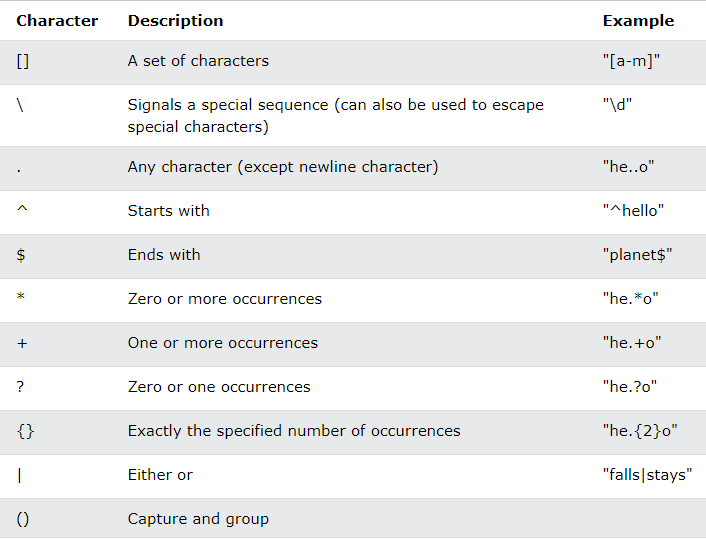

**Perhatikan Berikut ini!**

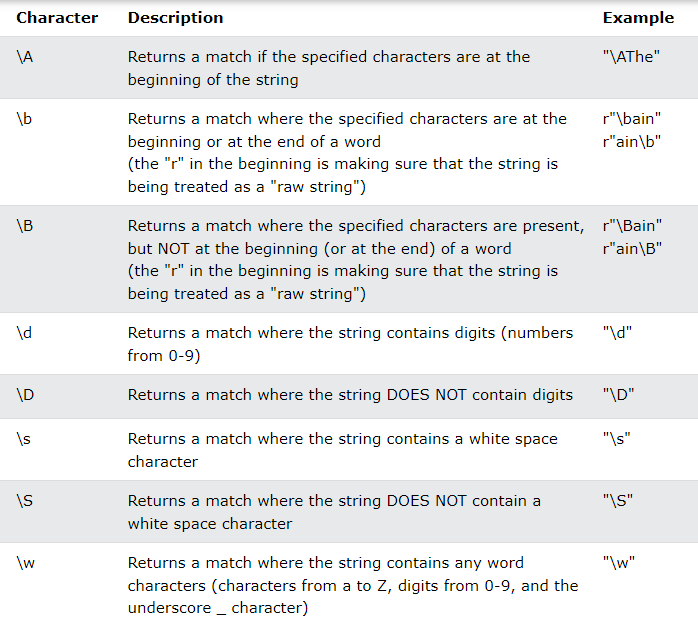

**Perhatikan Berikut ini!**

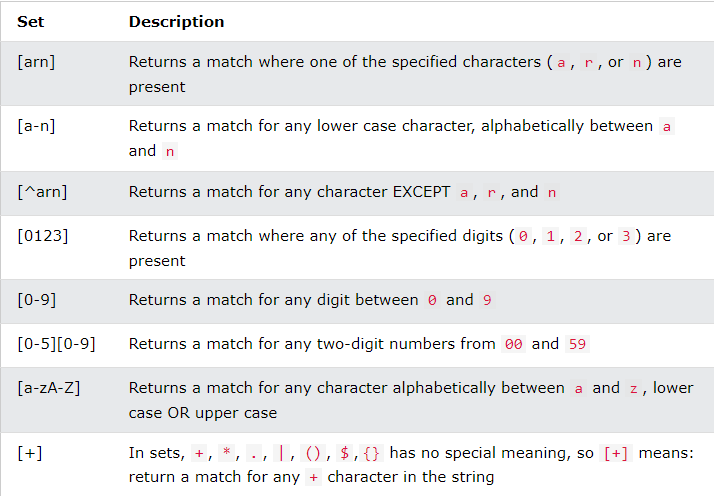

## Exercise 1

Coba selesaikan masalah berikut ini: 



In [ ]:
lean = pd.DataFrame({"Data":["Bogor", "Cianjur", "Bali"], "Jarak":["Ini 20 meter itu", 
                                                                   "Itu 30 centimeter saja", 
                                                                   "40 kilometer jauhnya"]})
lean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    3 non-null      object
 1   Jarak   3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
.................
lean

,Data,Jarak,Nama Satuan
0,Bogor,Ini 20 meter itu,meter
1,Cianjur,Itu 30 centimeter saja,centimeter
2,Bali,40 kilometer jauhnya,kilometer


In [ ]:
................
lean

,Data,Jarak,Satuan
0,Bogor,Ini 20 meter,20
1,Cianjur,Itu 30 meter,30
2,Bali,40 meter,40


In [ ]:
..........................
lean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    3 non-null      object
 1   Jarak   3 non-null      object
 2   Satuan  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


## Exercise 2

Coba selesaikan masalah berikut ini: 

In [ ]:
tweet = pd.DataFrame({"Nama":["Afifah", "Anoman", "Joko"], "Tweet":["Selamat pagi :)) Have a nice day ;)  #Semangat", 
                                                                    "Good morning everyone! Have a nice day. #greeting #sekolah #salam #semangat #berkarya", 
                                                                    "Assamulaikum.. Selamat Pagi #Semangat #Bogor"]})
tweet.head()

,Nama,Tweet
0,Afifah,Selamat pagi :)) Have a nice day ;) #Semangat
1,Anoman,Good morning everyone! Have a nice day. #greet...
2,Joko,Assamulaikum.. Selamat Pagi #Semangat #Bogor


In [ ]:
.....................
tweet

,Nama,Tweet,hastag
0,Afifah,Selamat pagi :)) Have a nice day ;) #Semangat,[Semangat]
1,Anoman,Good morning everyone! Have a nice day. #greet...,"[greeting, sekolah, salam, semangat, berkarya]"
2,Joko,Assamulaikum.. Selamat Pagi #Semangat #Bogor,"[Semangat, Bogor]"


In [ ]:
......................
tweet

,Nama,Tweet,hastag,count
0,Afifah,Selamat pagi :)) Have a nice day ;) #Semangat,[Semangat],1
1,Anoman,Good morning everyone! Have a nice day. #greet...,"[greeting, sekolah, salam, semangat, berkarya]",5
2,Joko,Assamulaikum.. Selamat Pagi #Semangat #Bogor,"[Semangat, Bogor]",2


# Preparation

In [ ]:
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09


In [ ]:
# 1. Ambil kode pos dari alamat peserta
data['postal_code'] = data.address.str.extract(r'.........') # diisi titiknya

# BEDAH
# r       (raw string)
# \d      (digit)
# +       (satu atau lebih kejadian)
# ()      (group)
# $       (diakhiri)

# menampilkan perubahan
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,1991-02-05,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,1993-01-11,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,1993-07-31,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,1991-11-04,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,2003-01-22,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074


```python
re.search('(?<=abc)def', 'abcdef').group(0)
```

In [ ]:
# 2. Ambil kota dari address setelah nama jalan
data['city'] = data['address'].str.extract(r'.........') #diisi titiknya

# BEDAH
# r         (raw string)
# (?<=...)  (dimulai dari ...)
# \w        (Kata - Word)
# .         (Karakter Apa saja)
# +         (lebih dari satu kejadian)
# (?= ...)  (diakhiri dari)

# menampilkan perubahan
data[['address', 'city']].head()

,address,city
0,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",Medan
1,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",Prabumulih
2,"Jalan Kebonjati No. 0\nAmbon, SS 57739",Ambon
3,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",Lubuklinggau
4,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",Kediri


In [ ]:
# 3. Ambil github profile dari first_name dan last_name
data['github_profile'] = 'https://github.com/' + data['first_name'].str.lower() + data['last_name'].str.lower()

# menampilkan perubahan
data[['github_profile']].head()

,github_profile
0,https://github.com/citranurdiyanti
1,https://github.com/arissetiawan
2,https://github.com/corneliahandayani
3,https://github.com/solehrajasa
4,https://github.com/viviastuti


```python
txt = "(62)-563242 324324"
x = re.sub(r'[()-]',"", txt)
x = re.sub(r'62',"0", x)
x = re.sub(r'\s',"0", x)
# re.sub(regex, new, string)
print(x)
```

In [ ]:
# 4. Ambil cleaned phone number
data['cleaned_phone_number'] = data['phone_number'].str.replace(r'.........', '0')

# BEDAH
# ^      (diawali)
# \      (dimulai)
# |      (atau)

data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'..........', '')

# BEDAH
# []     (set-character)
# ()-    (tanda yang dihapus)

data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'........', '')

# BEDAH
# \s     (whitespace)
# +      (satu atau bisa lebih)

# menampilkan perubahan
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city,github_profile,cleaned_phone_number
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,1991-02-05,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan,https://github.com/citranurdiyanti,01510812706
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,1993-01-11,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih,https://github.com/arissetiawan,00364617027
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,1993-07-31,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon,https://github.com/corneliahandayani,0898336695
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,1991-11-04,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau,https://github.com/solehrajasa,04183294756
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,2003-01-22,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri,https://github.com/viviastuti,0812511835


In [ ]:
# 4. Membuat nama team disusun first_name, last_name, country dan institute
def func(col):
    abbrev_name = "%s%s"%(col['first_name'][0],col['last_name'][0]) #Singkatan dari Nama Depan dan Nama Belakang dengan mengambil huruf pertama
    country = col['country']
    abbrev_institute = '%s'%(''.join(list(map(lambda word: word[0], col['institute'].split())))) #Singkatan dari value di kolom institute
    return "%s-%s-%s"%(abbrev_name,country,abbrev_institute)

# %s digunakan untuk input string artinya

data['team_name'] = data.apply(func, axis=1)
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city,github_profile,cleaned_phone_number,team_name
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,1991-02-05,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan,https://github.com/citranurdiyanti,01510812706,CN-Georgia-UPM
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,1993-01-11,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih,https://github.com/arissetiawan,00364617027,AS-Korea Utara-UD
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,1993-07-31,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon,https://github.com/corneliahandayani,0898336695,CH-Komoro-UHP
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,1991-11-04,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau,https://github.com/solehrajasa,04183294756,SR-Eritrea-PTY
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,2003-01-22,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri,https://github.com/viviastuti,0812511835,VA-Aljazair-PHR


Ketentuan pembuatan email!

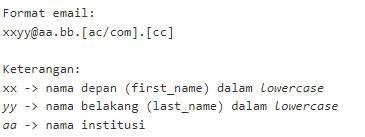

In [ ]:
# 5. Membuat email dengan ketentuan
def func(col):
    first_name_lower = col['first_name'].lower()
    last_name_lower = col['last_name'].lower()
    institute = ''.join(list(map(lambda word: word[0], col['institute'].lower().split()))) #Singkatan dari nama perusahaan dalam lowercase

    if 'Universitas' in col['institute']:
        if len(col['country'].split()) > 1: #Kondisi untuk mengecek apakah jumlah kata dari country lebih dari 1
            country = ''.join(list(map(lambda word: word[0], col['country'].lower().split())))
        else:
            country = col['country'][:2].lower()
        return "%s%s@%s.ac.%s"%(first_name_lower,last_name_lower,institute,country)

    return "%s%s@%s.com"%(first_name_lower,last_name_lower,institute)

# MAP ini menjalankan fungsi
# map(function, sequence)
# map(lambda word: word[0], col["institute"].lower().split())

data['email'] = data.apply(func, axis=1)
data[['first_name', 'last_name', 'institute','country','email']].head()

,first_name,last_name,institute,country,email
0,Citra,Nurdiyanti,UD Prakasa Mandasari,Georgia,citranurdiyanti@upm.com
1,Aris,Setiawan,Universitas Diponegoro,Korea Utara,arissetiawan@ud.ac.ku
2,Cornelia,Handayani,UD Hardiansyah Puspasari,Komoro,corneliahandayani@uhp.com
3,Soleh,Rajasa,Perum Tampubolon Yuliarti,Eritrea,solehrajasa@pty.com
4,Vivi,Astuti,PT Hardiansyah Rahimah,Aljazair,viviastuti@phr.com


In [ ]:
data[["institute", "country", "email"]].head(10)

,institute,country,email
0,UD Prakasa Mandasari,Georgia,citranurdiyanti@upm.com
1,Universitas Diponegoro,Korea Utara,arissetiawan@ud.ac.ku
2,UD Hardiansyah Puspasari,Komoro,corneliahandayani@uhp.com
3,Perum Tampubolon Yuliarti,Eritrea,solehrajasa@pty.com
4,PT Hardiansyah Rahimah,Aljazair,viviastuti@phr.com
5,CV Mardhiyah Haryanto,Zambia,bahuraksamangunsong@cmh.com
6,UD Irawan Wahyuni,Libya,tiaramaryati@uiw.com
7,Perum Purnawati,Republik Demokratik Kongo,dimazgunarto@pp.com
8,Universitas Bhayangkara Surabaya,Gambia,zizipuspasari@ubs.ac.ga
9,PD Pudjiastuti Palastri Tbk,Palau,cecepharyanto@pppt.com


In [ ]:
# 6 Tanggal lahir dengan mengubah dari database
# database YYYY-MM-DD
data['birth_date'] = pd.to_datetime(data['birth_date'], format='%d %b %Y')

# %d -- day
# %b -- month
# %Y -- year
data[['birth_date']].head()

,birth_date
0,1991-02-05
1,1993-01-11
2,1993-07-31
3,1991-11-04
4,2003-01-22


In [ ]:
# 7 Tanggal Kompetisi dengan mengubah dari database
# database YYYY-MM-DD HH:mm:ss

data['register_at'] = pd.to_datetime(data['register_time'], unit='s')

# tipe = D,s,ms,us,ns

data[['register_at']].head()

,register_at
0,2021-04-05 14:47:26
1,2021-04-05 14:46:58
2,2021-04-05 14:47:15
3,2021-04-05 14:47:14
4,2021-04-05 14:46:50


# Load data

Disini kita akan melakukan load data hasil tranformasi dengan memperhatikan
1. Nama kolom
2. Tipe kolom
3. Menentukan primary key, unique key
4. Panjang kolom

In [ ]:
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city,github_profile,cleaned_phone_number,team_name,email,register_at
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,1991-02-05,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan,https://github.com/citranurdiyanti,01510812706,CN-Georgia-UPM,citranurdiyanti@upm.com,2021-04-05 14:47:26
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,1993-01-11,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih,https://github.com/arissetiawan,00364617027,AS-Korea Utara-UD,arissetiawan@ud.ac.ku,2021-04-05 14:46:58
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,1993-07-31,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon,https://github.com/corneliahandayani,0898336695,CH-Komoro-UHP,corneliahandayani@uhp.com,2021-04-05 14:47:15
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,1991-11-04,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau,https://github.com/solehrajasa,04183294756,SR-Eritrea-PTY,solehrajasa@pty.com,2021-04-05 14:47:14
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,2003-01-22,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri,https://github.com/viviastuti,0812511835,VA-Aljazair-PHR,viviastuti@phr.com,2021-04-05 14:46:50


In [ ]:
data.to_csv(r'dataframe.csv', index = False, header=True)
# INDEX tidak disimpan dan HEADER digunakan

In [ ]:
from IPython.display import FileLink
FileLink(r'dataframe.csv')

/content/dataframe.csv

Isikan link feedback disini ya [https://bit.ly/FGALearning](https://bit.ly/FGALearning), saran dan masukkan mu sangat berharga untuk aku! Terimakasih atas kerjasama dan antusiasnya selama ini, sampai bertemu di session selanjutnya ya!